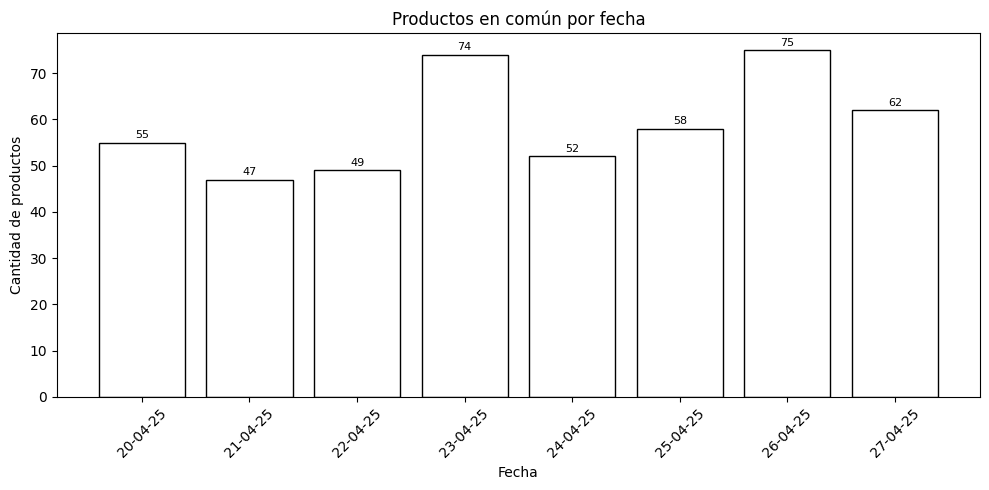

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path
from datetime import datetime
import matplotlib.dates as mdates

common_product_amount = dict()

for child in Path(f'../../utils/common-products-filter/results/').iterdir():
    data = pd.read_csv(child)
    date = datetime.strptime(child.name.replace(".csv", ""), "%d-%m-%Y").date()
    data_amount = len(data["search"])

    common_product_amount[date] = data_amount

df_cpa = pd.DataFrame(list(common_product_amount.items()), columns=["Fecha", "Cantidad"])
df_cpa.sort_values(by="Fecha", inplace=True)

plt.figure(figsize=(10, 5))
bars = plt.bar(df_cpa["Fecha"], df_cpa["Cantidad"], color='white', edgecolor='black')

for bar in bars:
    height = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width() / 2, 
        height + 0.5,
        f'{int(height)}', 
        ha='center', 
        va='bottom', 
        fontsize=8
    )

plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%d-%m-%y')) 
plt.title("Productos en común por fecha")
plt.xlabel('Fecha')
plt.ylabel('Cantidad de productos')
plt.xticks(rotation=45)
plt.tight_layout()

plt.savefig('graph.png', bbox_inches='tight')

plt.show()